In [1]:
#importing libraries : numpy | pandas | matplotlip | seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load data
data = pd.read_csv('Wuzzuf_Jobs.csv')
data.shape

(4380, 8)

In [2]:
#take quick look on data : 
data.head(10)

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ..."
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin..."
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ..."
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an..."
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain"
5,Senior .NET Developer (Desktop Application),Dexef,Maadi,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"ASP.NET, Desktop Development, Information Tech..."
6,Preschool French Teacher,Leap Development Hub,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Education, Education/Teaching"
7,Junior Business Development Specialist (out door),E3mel Business for Financial & Managerial Cons...,Maadi,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Sales Target, Sales Skills, B2B Sales, B2C Sal..."
8,Indoor Sales Executive Furniture,Line Design,Nasr City,Full Time,Experienced,1-3 Yrs of Exp,Cairo,"sales skills, Sales/Retail"
9,Content Creator / Copy Writer - Alexandria,EL KHETA,Alexandria,Full Time,Entry Level,1+ Yrs of Exp,Egypt,"Copywriter, SEO, WordPress, Creative, Writing,..."


In [3]:
#checking the unique and the top values
data.describe()

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
count,4380,4380,4380,4380,4380,4380,4380,4380
unique,2965,1534,162,6,9,101,42,4227
top,Accountant,Confidential,Cairo,Full Time,Experienced,1-3 Yrs of Exp,Cairo,"Corporate Sales, Real Estate, Advertising, Mar..."
freq,57,590,563,4168,2198,414,2230,12


In [4]:
# check null values
data.isnull().sum()

Title       0
Company     0
Location    0
Type        0
Level       0
YearsExp    0
Country     0
Skills      0
dtype: int64

In [5]:
# check for duplicates
data.duplicated().sum()

3

In [6]:
#drop duplicates data
data = data.drop_duplicates()
data.duplicated().sum()

0

In [7]:
#Rename the country column to city
data = data.rename(columns = {'Country':'City'})
data.head(0)

,Title,Company,Location,Type,Level,YearsExp,City,Skills


In [11]:
# most popular job titles
data["Title"].value_counts().head(10)

Accountant                      57
Sales Representative            47
Graphic Designer                43
Digital Marketing Specialist    26
Sales Manager                   25
Social Media Specialist         24
Receptionist                    23
Executive Secretary             21
Sales Executive                 18
Marketing Specialist            17
Name: Title, dtype: int64

In [12]:
# most popular City
data["Location"].value_counts().head(10)

 Cairo             563
 Maadi             524
 New Cairo         520
 Nasr City         424
 6th of October    282
 Heliopolis        247
 Mohandessin       140
 Dokki             140
 Alexandria        130
 Giza              126
Name: Location, dtype: int64

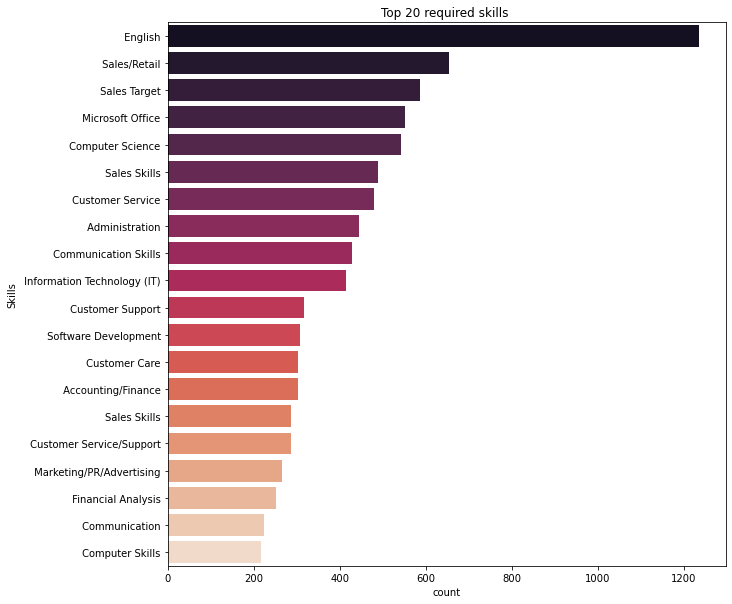

In [14]:
# splitting skills to determine ( Most Required Skills )
New_Data = data.assign(Skills = data['Skills'].str.split(',')).explode('Skills')
# plotting  top 20 skills 
plt.rcParams["figure.figsize"] = 10,10
sns.countplot(data=New_Data, y="Skills", palette="rocket",order=New_Data.Skills.value_counts().iloc[:20].index)
plt.title("Top 20 required skills ")
plt.show()


In [15]:
# most companies demanding for jobs?
data["Company"].value_counts().head(10)

Confidential                                        590
Mishkat Nour                                         39
Expand Cart                                          35
EGIC                                                 34
Aqarmap.com                                          25
Majorel Egypt                                        23
Ghassan Ahmed Alsulaiman for Electronic Services     21
Flairstech                                           18
Profolio Consulting                                  17
OPPO Egypt                                           16
Name: Company, dtype: int64

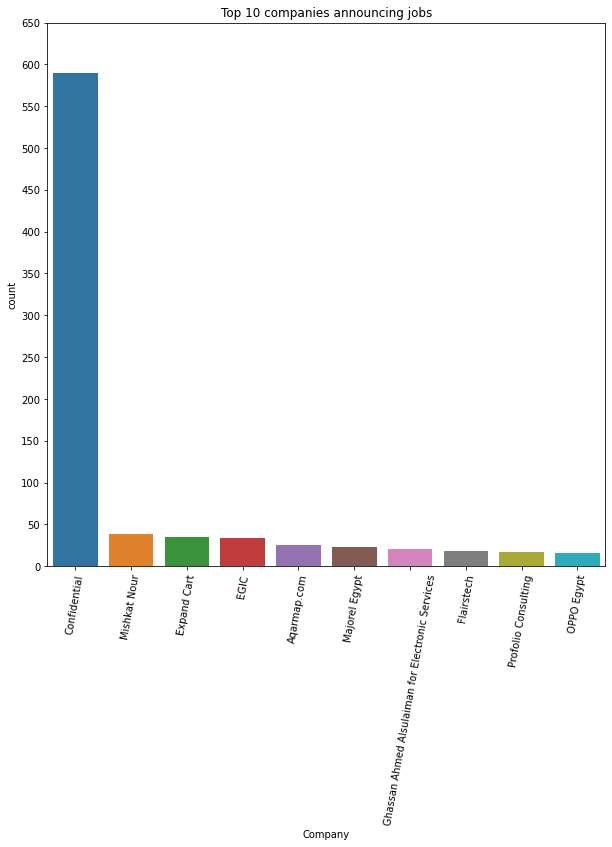

In [16]:
sns.countplot(data = data, x = "Company",order=data.Company.value_counts().iloc[:10].index , palette= "tab10");
plt.xticks(rotation= 80);
plt.yticks(np.arange(0, 700, step = 50))
plt.title("Top 10 companies announcing jobs")
plt.show()

In [17]:
# Top required experiences levels
data["Level"].value_counts()

Experienced            2196
Entry Level            1138
Manager                 737
Work From Home          102
Part Time                74
Shift Based              47
Senior Management        37
Freelance / Project      32
Student                  14
Name: Level, dtype: int64

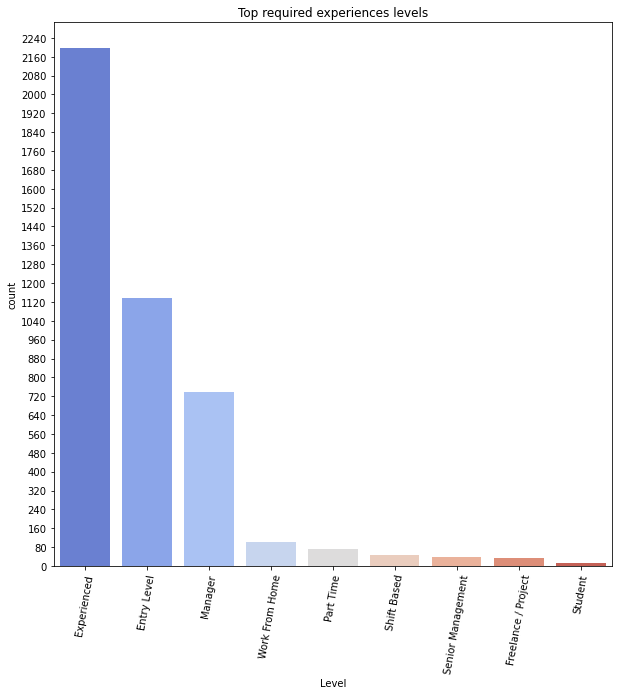

In [18]:
# Top required experiences levels
plt.title("Top required experiences levels")
sns.countplot(data = data, x = "Level" , order = data.Level.value_counts().iloc[:].index,palette = "coolwarm")
plt.xticks(rotation = 80)
plt.yticks(np.arange(0, 2300, step = 80))
plt.show()